In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
data_large=pd.read_csv("/Users/poojazare/Documents/Spring2018/CS6001-SpatialTemporal/Project/chicago_final_clean.csv",index_col=0)

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
data=data_large.sample(80000)
data.shape

(80000, 110)

In [4]:
data.head(5)

,ID,Date,Block,IUCR,Description,Ward,Community.Area,FBI.Code,X.Coordinate,Y.Coordinate,Year,Latitude,Longitude,Location,severe,Primary.Type_ARSON,Primary.Type_ASSAULT,Primary.Type_BATTERY,Primary.Type_BURGLARY,Primary.Type_CRIM.SEXUAL.ASSAULT,Primary.Type_CRIMINAL.DAMAGE,Primary.Type_CRIMINAL.TRESPASS,Primary.Type_DECEPTIVE.PRACTICE,Primary.Type_GAMBLING,Primary.Type_HOMICIDE,Primary.Type_INTERFERENCE.WITH.PUBLIC.OFFICER,Primary.Type_INTIMIDATION,Primary.Type_KIDNAPPING,Primary.Type_LIQUOR.LAW.VIOLATION,Primary.Type_MOTOR.VEHICLE.THEFT,Primary.Type_NARCOTICS,Primary.Type_OFFENSE.INVOLVING.CHILDREN,Primary.Type_PROSTITUTION,Primary.Type_PUBLIC.PEACE.VIOLATION,Primary.Type_ROBBERY,Primary.Type_SEX.OFFENSE,Primary.Type_STALKING,Primary.Type_THEFT,Primary.Type_WEAPONS.VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,...,District_D9.0,District,Primary.Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX,Under18_over64,Unemployed,House_below_poverty,Location.Description_ALLEY,Location.Description_APARTMENT,Location.Description_BAR OR TAVERN,Location.Description_COMMERCIAL / BUSINESS OFFICE,Location.Description_CONVENIENCE STORE,Location.Description_CTA PLATFORM,Location.Description_CTA TRAIN,Location.Description_DEPARTMENT STORE,Location.Description_GAS STATION,Location.Description_GROCERY FOOD STORE,Location.Description_PARK PROPERTY,Location.Description_PARKING LOT/GARAGE(NON.RESID.),Location.Description_RESIDENCE,Location.Description_RESIDENCE PORCH/HALLWAY,Location.Description_RESIDENCE-GARAGE,Location.Description_RESIDENTIAL YARD (FRONT/BACK),Location.Description_RESTAURANT,"Location.Description_SCHOOL, PUBLIC, BUILDING","Location.Description_SCHOOL, PUBLIC, GROUNDS",Location.Description_SIDEWALK,Location.Description_SMALL RETAIL STORE,Location.Description_STREET,Location.Description_VACANT LOT/LAND,Location.Description_VEHICLE NON-COMMERCIAL
1058496,8439120,01/12/2012 12:30:00 PM,007XX E 105TH PL,0620,UNLAWFUL ENTRY,9,50,05,1183108,1835160,2012,41.702875,-87.605114,"(41.702874884000003, -87.605114212000004)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,D5.0,BURGLARY,12:30,20120112,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.701615,20588,51.0,38.6,22.8,21.6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
641512,8557721,04/08/2012 08:08:00 PM,016XX W HOWARD ST,1811,POSS: CANNABIS 30GMS OR LESS,49,1,18,1164241,1950346,2012,42.019373,-87.670946,"(42.019372887999999, -87.67094645200001)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,D24.0,NARCOTICS,20:08,20120408,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1.354074,23939,39.0,27.5,8.7,23.6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1530779,9613265,05/14/2014 08:47:00 PM,002XX E 121ST PL,0486,DOMESTIC BATTERY SIMPLE,9,53,08B,1179993,1824447,2014,41.673549,-87.616847,"(41.673548598000004, -87.616846764000002)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,D5.0,BATTERY,20:47,20140514,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1.468924,16563,62.0,42.1,19.4,25.9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
525066,11138976,11/03/2017 06:30:00 PM,002XX E 103RD ST,0430,AGGRAVATED: OTHER DANG WEAPON,9,49,04B,1179865,1836733,2017,41.707266,-87.616941,"(41.707266044999997, -87.616941279000002)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,D5.0,BATTERY,18:30,20171103,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1.191298,17949,52.0,41.2,20.3,19.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
470506,11037086,07/31/2017 08:00:00 AM,101XX S BENSLEY AVE,0810,OVER $500,10,51,06,1194487,1838321,2017,41.711277,-87.563344,"(41.711277394, -87.563344278999978)",0,0,0,0,0,0,0

In [5]:
data.reset_index(inplace=True)

In [6]:
data.head(5)

,index,ID,Date,Block,IUCR,Description,Ward,Community.Area,FBI.Code,X.Coordinate,Y.Coordinate,Year,Latitude,Longitude,Location,severe,Primary.Type_ARSON,Primary.Type_ASSAULT,Primary.Type_BATTERY,Primary.Type_BURGLARY,Primary.Type_CRIM.SEXUAL.ASSAULT,Primary.Type_CRIMINAL.DAMAGE,Primary.Type_CRIMINAL.TRESPASS,Primary.Type_DECEPTIVE.PRACTICE,Primary.Type_GAMBLING,Primary.Type_HOMICIDE,Primary.Type_INTERFERENCE.WITH.PUBLIC.OFFICER,Primary.Type_INTIMIDATION,Primary.Type_KIDNAPPING,Primary.Type_LIQUOR.LAW.VIOLATION,Primary.Type_MOTOR.VEHICLE.THEFT,Primary.Type_NARCOTICS,Primary.Type_OFFENSE.INVOLVING.CHILDREN,Primary.Type_PROSTITUTION,Primary.Type_PUBLIC.PEACE.VIOLATION,Primary.Type_ROBBERY,Primary.Type_SEX.OFFENSE,Primary.Type_STALKING,Primary.Type_THEFT,Primary.Type_WEAPONS.VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,...,District_D9.0,District,Primary.Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX,Under18_over64,Unemployed,House_below_poverty,Location.Description_ALLEY,Location.Description_APARTMENT,Location.Description_BAR OR TAVERN,Location.Description_COMMERCIAL / BUSINESS OFFICE,Location.Description_CONVENIENCE STORE,Location.Description_CTA PLATFORM,Location.Description_CTA TRAIN,Location.Description_DEPARTMENT STORE,Location.Description_GAS STATION,Location.Description_GROCERY FOOD STORE,Location.Description_PARK PROPERTY,Location.Description_PARKING LOT/GARAGE(NON.RESID.),Location.Description_RESIDENCE,Location.Description_RESIDENCE PORCH/HALLWAY,Location.Description_RESIDENCE-GARAGE,Location.Description_RESIDENTIAL YARD (FRONT/BACK),Location.Description_RESTAURANT,"Location.Description_SCHOOL, PUBLIC, BUILDING","Location.Description_SCHOOL, PUBLIC, GROUNDS",Location.Description_SIDEWALK,Location.Description_SMALL RETAIL STORE,Location.Description_STREET,Location.Description_VACANT LOT/LAND,Location.Description_VEHICLE NON-COMMERCIAL
0,1058496,8439120,01/12/2012 12:30:00 PM,007XX E 105TH PL,0620,UNLAWFUL ENTRY,9,50,05,1183108,1835160,2012,41.702875,-87.605114,"(41.702874884000003, -87.605114212000004)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,D5.0,BURGLARY,12:30,20120112,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.701615,20588,51.0,38.6,22.8,21.6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,641512,8557721,04/08/2012 08:08:00 PM,016XX W HOWARD ST,1811,POSS: CANNABIS 30GMS OR LESS,49,1,18,1164241,1950346,2012,42.019373,-87.670946,"(42.019372887999999, -87.67094645200001)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,D24.0,NARCOTICS,20:08,20120408,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1.354074,23939,39.0,27.5,8.7,23.6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1530779,9613265,05/14/2014 08:47:00 PM,002XX E 121ST PL,0486,DOMESTIC BATTERY SIMPLE,9,53,08B,1179993,1824447,2014,41.673549,-87.616847,"(41.673548598000004, -87.616846764000002)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,D5.0,BATTERY,20:47,20140514,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1.468924,16563,62.0,42.1,19.4,25.9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,525066,11138976,11/03/2017 06:30:00 PM,002XX E 103RD ST,0430,AGGRAVATED: OTHER DANG WEAPON,9,49,04B,1179865,1836733,2017,41.707266,-87.616941,"(41.707266044999997, -87.616941279000002)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,D5.0,BATTERY,18:30,20171103,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1.191298,17949,52.0,41.2,20.3,19.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,470506,11037086,07/31/2017 08:00:00 AM,101XX S BENSLEY AVE,0810,OVER $500,10,51,06,1194487,1838321,2017,41.711277,-87.563344,"(41.711277394, -87.563344278999978)",0,0,0,0,0,0,0,0,0,0

In [7]:
data=data.drop(["index"], axis=1)

In [8]:
data.head(5)

,ID,Date,Block,IUCR,Description,Ward,Community.Area,FBI.Code,X.Coordinate,Y.Coordinate,Year,Latitude,Longitude,Location,severe,Primary.Type_ARSON,Primary.Type_ASSAULT,Primary.Type_BATTERY,Primary.Type_BURGLARY,Primary.Type_CRIM.SEXUAL.ASSAULT,Primary.Type_CRIMINAL.DAMAGE,Primary.Type_CRIMINAL.TRESPASS,Primary.Type_DECEPTIVE.PRACTICE,Primary.Type_GAMBLING,Primary.Type_HOMICIDE,Primary.Type_INTERFERENCE.WITH.PUBLIC.OFFICER,Primary.Type_INTIMIDATION,Primary.Type_KIDNAPPING,Primary.Type_LIQUOR.LAW.VIOLATION,Primary.Type_MOTOR.VEHICLE.THEFT,Primary.Type_NARCOTICS,Primary.Type_OFFENSE.INVOLVING.CHILDREN,Primary.Type_PROSTITUTION,Primary.Type_PUBLIC.PEACE.VIOLATION,Primary.Type_ROBBERY,Primary.Type_SEX.OFFENSE,Primary.Type_STALKING,Primary.Type_THEFT,Primary.Type_WEAPONS.VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,...,District_D9.0,District,Primary.Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX,Under18_over64,Unemployed,House_below_poverty,Location.Description_ALLEY,Location.Description_APARTMENT,Location.Description_BAR OR TAVERN,Location.Description_COMMERCIAL / BUSINESS OFFICE,Location.Description_CONVENIENCE STORE,Location.Description_CTA PLATFORM,Location.Description_CTA TRAIN,Location.Description_DEPARTMENT STORE,Location.Description_GAS STATION,Location.Description_GROCERY FOOD STORE,Location.Description_PARK PROPERTY,Location.Description_PARKING LOT/GARAGE(NON.RESID.),Location.Description_RESIDENCE,Location.Description_RESIDENCE PORCH/HALLWAY,Location.Description_RESIDENCE-GARAGE,Location.Description_RESIDENTIAL YARD (FRONT/BACK),Location.Description_RESTAURANT,"Location.Description_SCHOOL, PUBLIC, BUILDING","Location.Description_SCHOOL, PUBLIC, GROUNDS",Location.Description_SIDEWALK,Location.Description_SMALL RETAIL STORE,Location.Description_STREET,Location.Description_VACANT LOT/LAND,Location.Description_VEHICLE NON-COMMERCIAL
0,8439120,01/12/2012 12:30:00 PM,007XX E 105TH PL,0620,UNLAWFUL ENTRY,9,50,05,1183108,1835160,2012,41.702875,-87.605114,"(41.702874884000003, -87.605114212000004)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,D5.0,BURGLARY,12:30,20120112,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.701615,20588,51.0,38.6,22.8,21.6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,8557721,04/08/2012 08:08:00 PM,016XX W HOWARD ST,1811,POSS: CANNABIS 30GMS OR LESS,49,1,18,1164241,1950346,2012,42.019373,-87.670946,"(42.019372887999999, -87.67094645200001)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,D24.0,NARCOTICS,20:08,20120408,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1.354074,23939,39.0,27.5,8.7,23.6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9613265,05/14/2014 08:47:00 PM,002XX E 121ST PL,0486,DOMESTIC BATTERY SIMPLE,9,53,08B,1179993,1824447,2014,41.673549,-87.616847,"(41.673548598000004, -87.616846764000002)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,D5.0,BATTERY,20:47,20140514,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1.468924,16563,62.0,42.1,19.4,25.9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11138976,11/03/2017 06:30:00 PM,002XX E 103RD ST,0430,AGGRAVATED: OTHER DANG WEAPON,9,49,04B,1179865,1836733,2017,41.707266,-87.616941,"(41.707266044999997, -87.616941279000002)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,D5.0,BATTERY,18:30,20171103,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1.191298,17949,52.0,41.2,20.3,19.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,11037086,07/31/2017 08:00:00 AM,101XX S BENSLEY AVE,0810,OVER $500,10,51,06,1194487,1838321,2017,41.711277,-87.563344,"(41.711277394, -87.563344278999978)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [9]:
data=data.drop(["ID","Date","Block","IUCR","Description","Ward","Community.Area","FBI.Code"], axis=1)

In [10]:
data=data.drop(["X.Coordinate","Y.Coordinate","Year","Location","District","Primary.Type","time_24hour","Date_no_time"], axis=1)

In [11]:
a=list(data.columns.values)
droplist=[]
for i in a:
    if i.startswith("Primary.Type"):
        droplist.append(i)
data=data.drop(droplist, axis=1)

In [12]:
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
itrain, itest = train_test_split(range(data.shape[0]), train_size=0.7)

In [14]:
mask=np.ones(data.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask=(mask==1)

In [15]:
data.shape

(80000, 70)

In [16]:
data.head(5)

,Latitude,Longitude,severe,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX,Under18_over64,Unemployed,House_below_poverty,Location.Description_ALLEY,Location.Description_APARTMENT,Location.Description_BAR OR TAVERN,Location.Description_COMMERCIAL / BUSINESS OFFICE,Location.Description_CONVENIENCE STORE,Location.Description_CTA PLATFORM,Location.Description_CTA TRAIN,Location.Description_DEPARTMENT STORE,Location.Description_GAS STATION,Location.Description_GROCERY FOOD STORE,Location.Description_PARK PROPERTY,Location.Description_PARKING LOT/GARAGE(NON.RESID.),Location.Description_RESIDENCE,Location.Description_RESIDENCE PORCH/HALLWAY,Location.Description_RESIDENCE-GARAGE,Location.Description_RESIDENTIAL YARD (FRONT/BACK),Location.Description_RESTAURANT,"Location.Description_SCHOOL, PUBLIC, BUILDING","Location.Description_SCHOOL, PUBLIC, GROUNDS",Location.Description_SIDEWALK,Location.Description_SMALL RETAIL STORE,Location.Description_STREET,Location.Description_VACANT LOT/LAND,Location.Description_VEHICLE NON-COMMERCIAL
0,41.702875,-87.605114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.701615,20588,51.0,38.6,22.8,21.6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,42.019373,-87.670946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1.354074,23939,39.0,27.5,8.7,23.6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,41.673549,-87.616847,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1.468924,16563,62.0,42.1,19.4,25.9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,41.707266,-87.616941,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1.191298,17949,52.0,41.2,20.3,19.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,41.711277,-87.563344,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0.346209,14685,65.0,39.5,16.3,29.2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [28]:
data=data.dropna()

In [33]:
np.nan_to_num(data)

array([[ 41.70287488, -87.60511421,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 42.01937289, -87.67094645,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 41.6735486 , -87.61684676,   1.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [ 41.70607019, -87.6536458 ,   1.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 41.70001757, -87.53165745,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 41.90398322, -87.62610106,   0.        , ...,   1.        ,
          0.        ,   0.        ]])

In [34]:
#We have a list of continuous features, or in other words standardizable variables
STANDARDIZABLE=["Latitude", "Longitude","closest_station","House_below_poverty","Unemployed","Under18_over64","Income","HARDSHIP INDEX"]

#Also create a list for indicator variable. We can do this by excluding the above continuous features from total features. 
INDICATOR=list(data.columns)
#We need to remove the response variable from our total list of features
INDICATOR.remove(u'severe')


In [35]:
print (len(STANDARDIZABLE), len(INDICATOR))

8 69


In [36]:
from sklearn.preprocessing import StandardScaler
#Standardize training set
data.loc[mask,STANDARDIZABLE]=StandardScaler().fit_transform(data.loc[mask,STANDARDIZABLE])
#Standardize test set
data.loc[~mask,STANDARDIZABLE]=StandardScaler().fit_transform(data.loc[~mask,STANDARDIZABLE])

In [37]:
data.head(5)

,Latitude,Longitude,severe,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX,Under18_over64,Unemployed,House_below_poverty,Location.Description_ALLEY,Location.Description_APARTMENT,Location.Description_BAR OR TAVERN,Location.Description_COMMERCIAL / BUSINESS OFFICE,Location.Description_CONVENIENCE STORE,Location.Description_CTA PLATFORM,Location.Description_CTA TRAIN,Location.Description_DEPARTMENT STORE,Location.Description_GAS STATION,Location.Description_GROCERY FOOD STORE,Location.Description_PARK PROPERTY,Location.Description_PARKING LOT/GARAGE(NON.RESID.),Location.Description_RESIDENCE,Location.Description_RESIDENCE PORCH/HALLWAY,Location.Description_RESIDENCE-GARAGE,Location.Description_RESIDENTIAL YARD (FRONT/BACK),Location.Description_RESTAURANT,"Location.Description_SCHOOL, PUBLIC, BUILDING","Location.Description_SCHOOL, PUBLIC, GROUNDS",Location.Description_SIDEWALK,Location.Description_SMALL RETAIL STORE,Location.Description_STREET,Location.Description_VACANT LOT/LAND,Location.Description_VEHICLE NON-COMMERCIAL
0,-1.482963,1.043092,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.197838,-0.258523,-0.130493,0.429359,0.741262,-0.325646,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1.906673,0.015536,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.035518,-0.081214,-0.531730,-0.939336,-1.079850,-0.134099,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.781345,0.849391,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.072968,-0.481125,0.239233,0.865759,0.299304,0.089032,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-1.435463,0.856404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,-0.017842,-0.403577,-0.096702,0.752743,0.417638,-0.501728,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,-1.378989,1.674042,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,-0.293132,-0.582946,0.339793,0.544304,-0.100264,0.409177,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


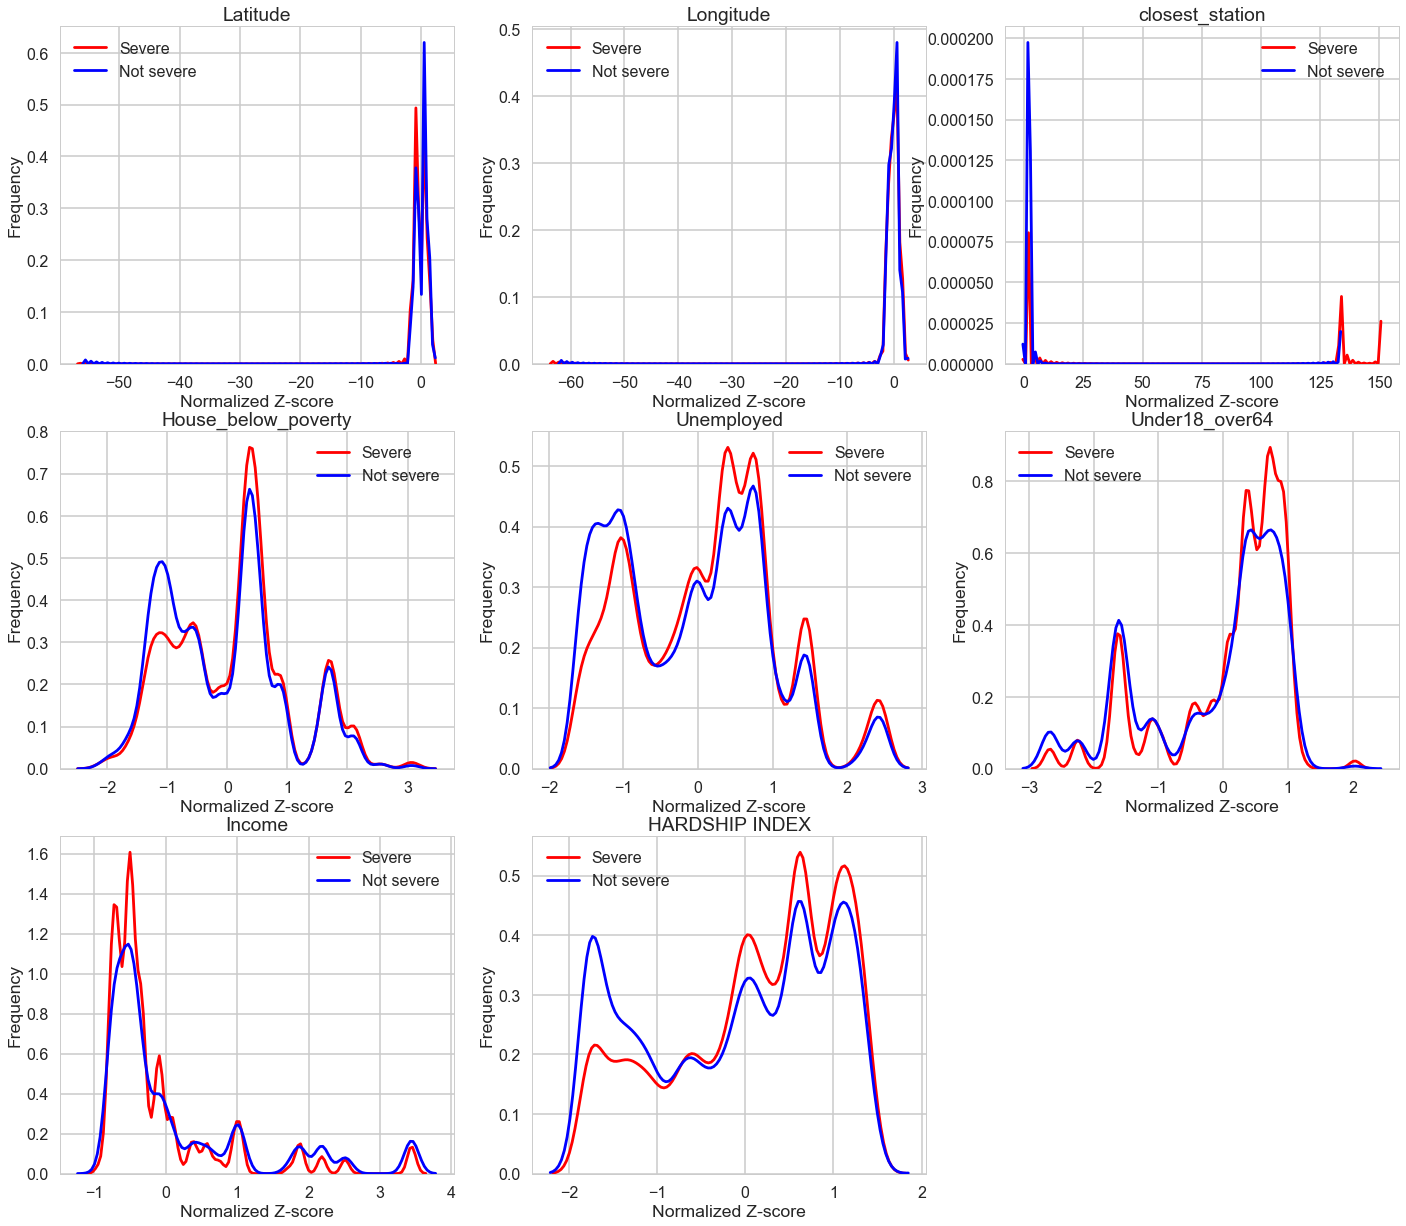

In [38]:
fig=plt.figure(figsize=(24,36))
pos=data[data["severe"]==1]
neg=data[data["severe"]==0]
for k in range (8):
    ax=fig.add_subplot(5,3,k+1)    
    sns.kdeplot(pos[STANDARDIZABLE[k]],color="red",label="Severe")
    sns.kdeplot(neg[STANDARDIZABLE[k]],color="blue",label="Not severe")
    ax.set_title(STANDARDIZABLE[k])
    ax.set_xlabel("Normalized Z-score")
    ax.set_ylabel("Frequency")

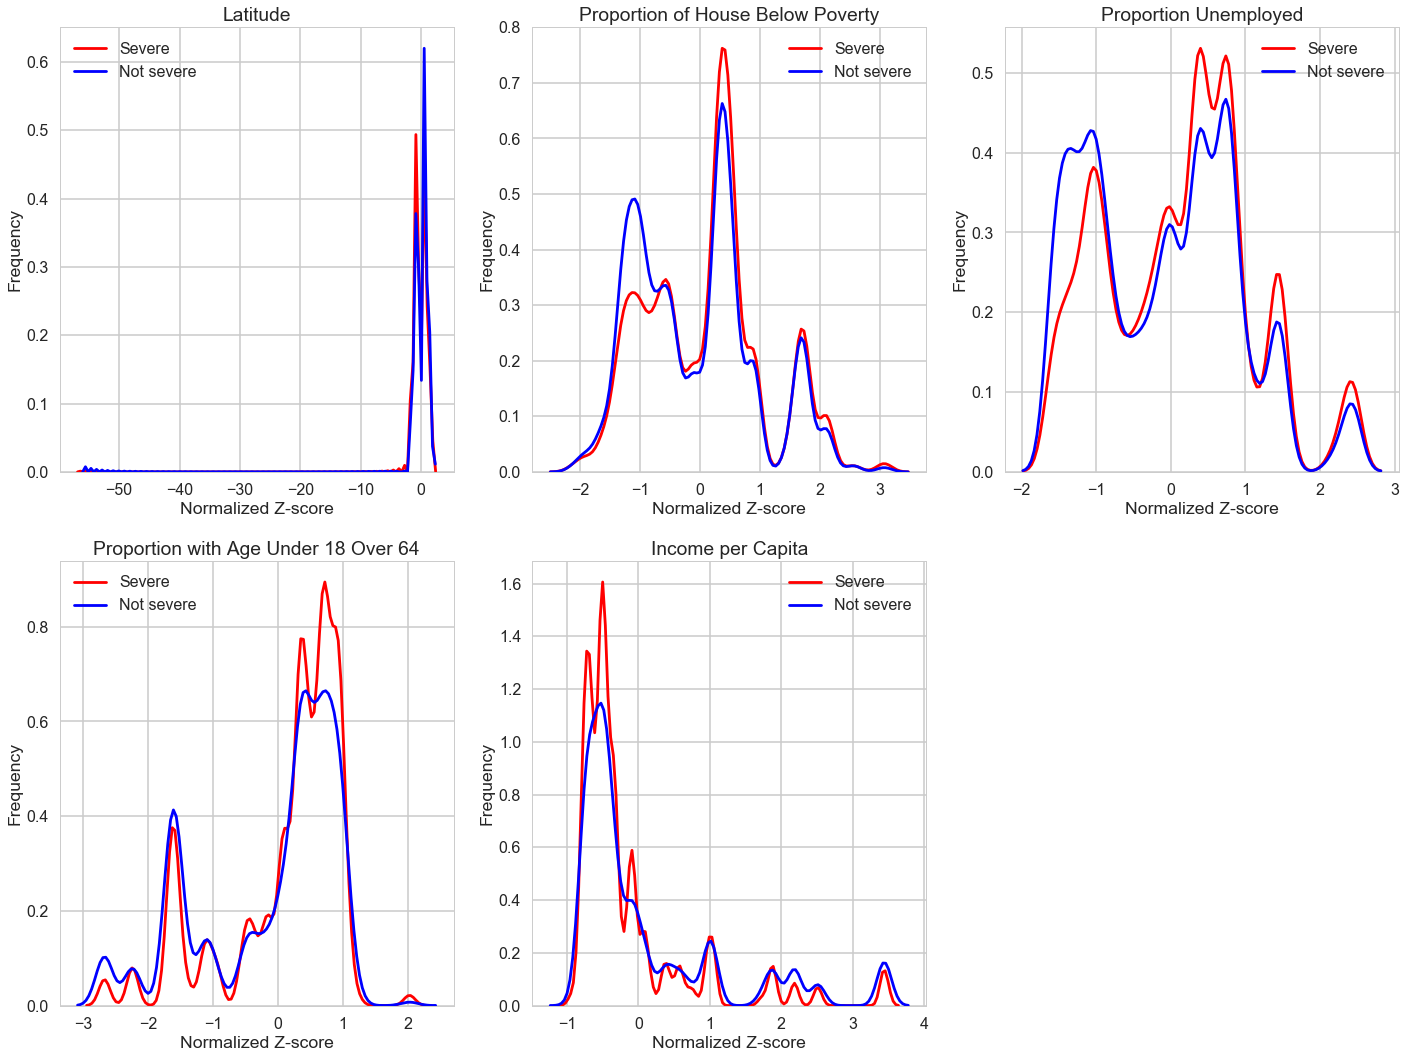

In [42]:
#The following command just plot those continuous features with significant effects (for presentation purpose)
plotlist=["Latitude","House_below_poverty","Unemployed","Under18_over64","Income"]
plotlist_title=["Latitude","Proportion of House Below Poverty","Proportion Unemployed", "Proportion with Age Under 18 Over 64", "Income per Capita"]
fig=plt.figure(figsize=(24,18))
for k in range (5):
    ax=fig.add_subplot(2,3,k+1)    
    sns.kdeplot(pos[plotlist[k]],color="red",label="Severe")
    sns.kdeplot(neg[plotlist[k]],color="blue",label="Not severe")
    ax.set_title(plotlist_title[k])
    ax.set_xlabel("Normalized Z-score")
    ax.set_ylabel("Frequency")

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


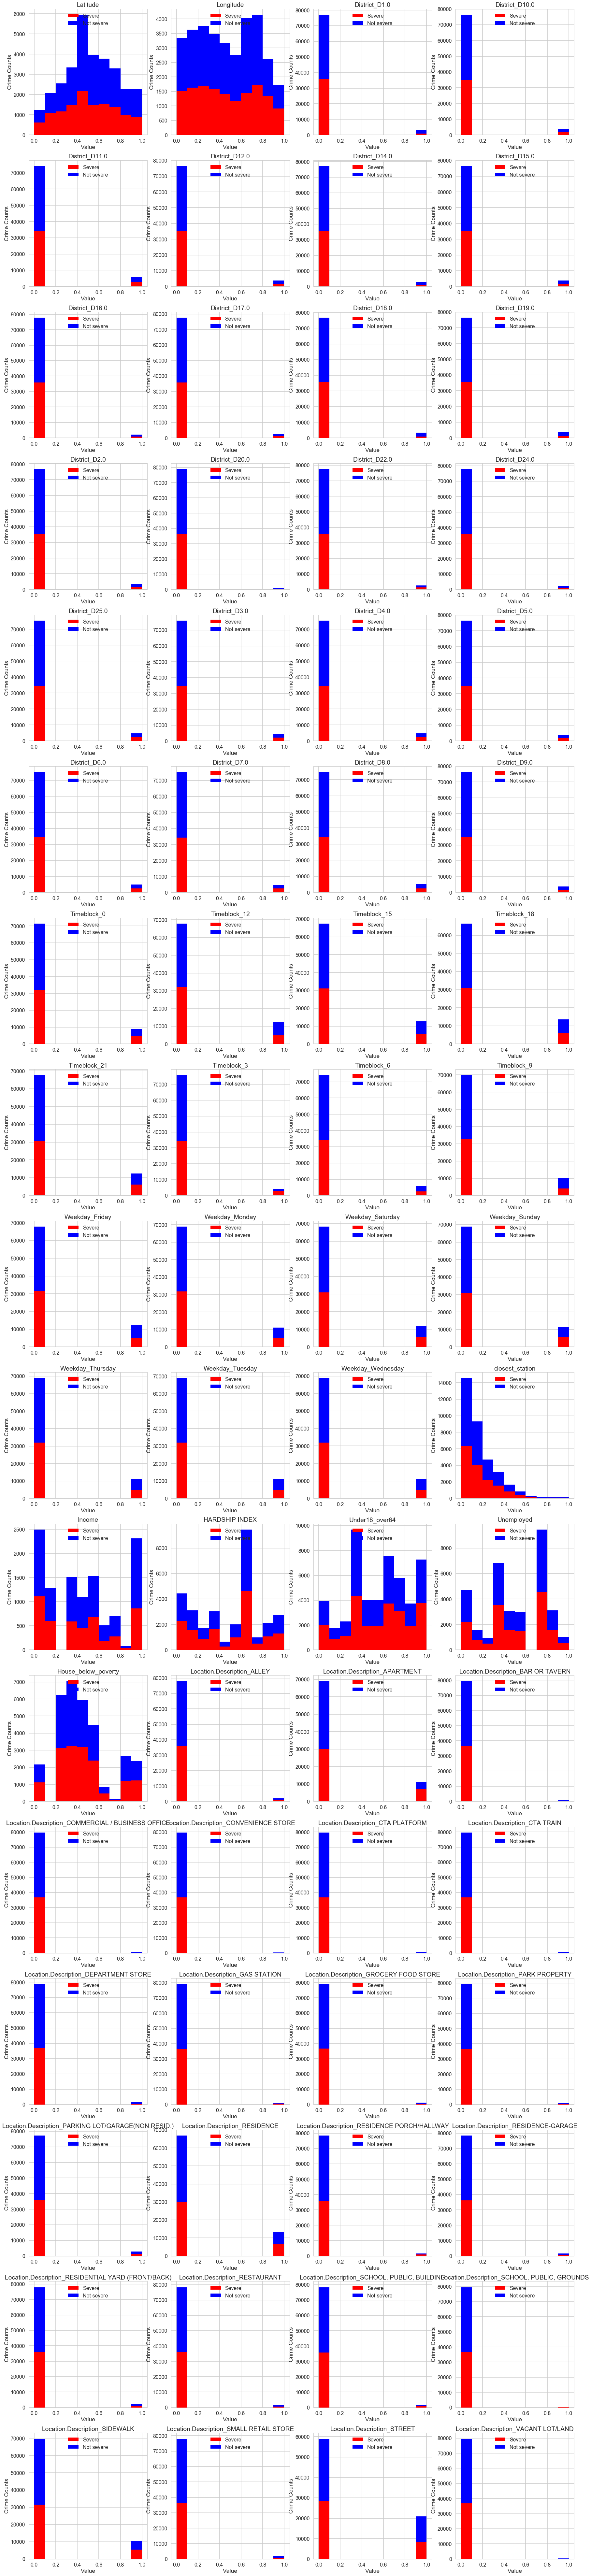

In [44]:
fig=plt.figure(figsize=(30,144))
pos=data[data['severe']==1]
neg=data[data['severe']==0]
for k in range (68):
    ax=fig.add_subplot(17,4,k+1)
    ax.hist((pos[INDICATOR[k]],neg[INDICATOR[k]]),stacked=True,color=("red","blue"),range=[0,1])
    ax.set_title(INDICATOR[k])
    ax.legend(("Severe","Not severe"),loc="upper center")
    ax.set_xlabel("Value")
    ax.set_ylabel("Crime Counts")

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


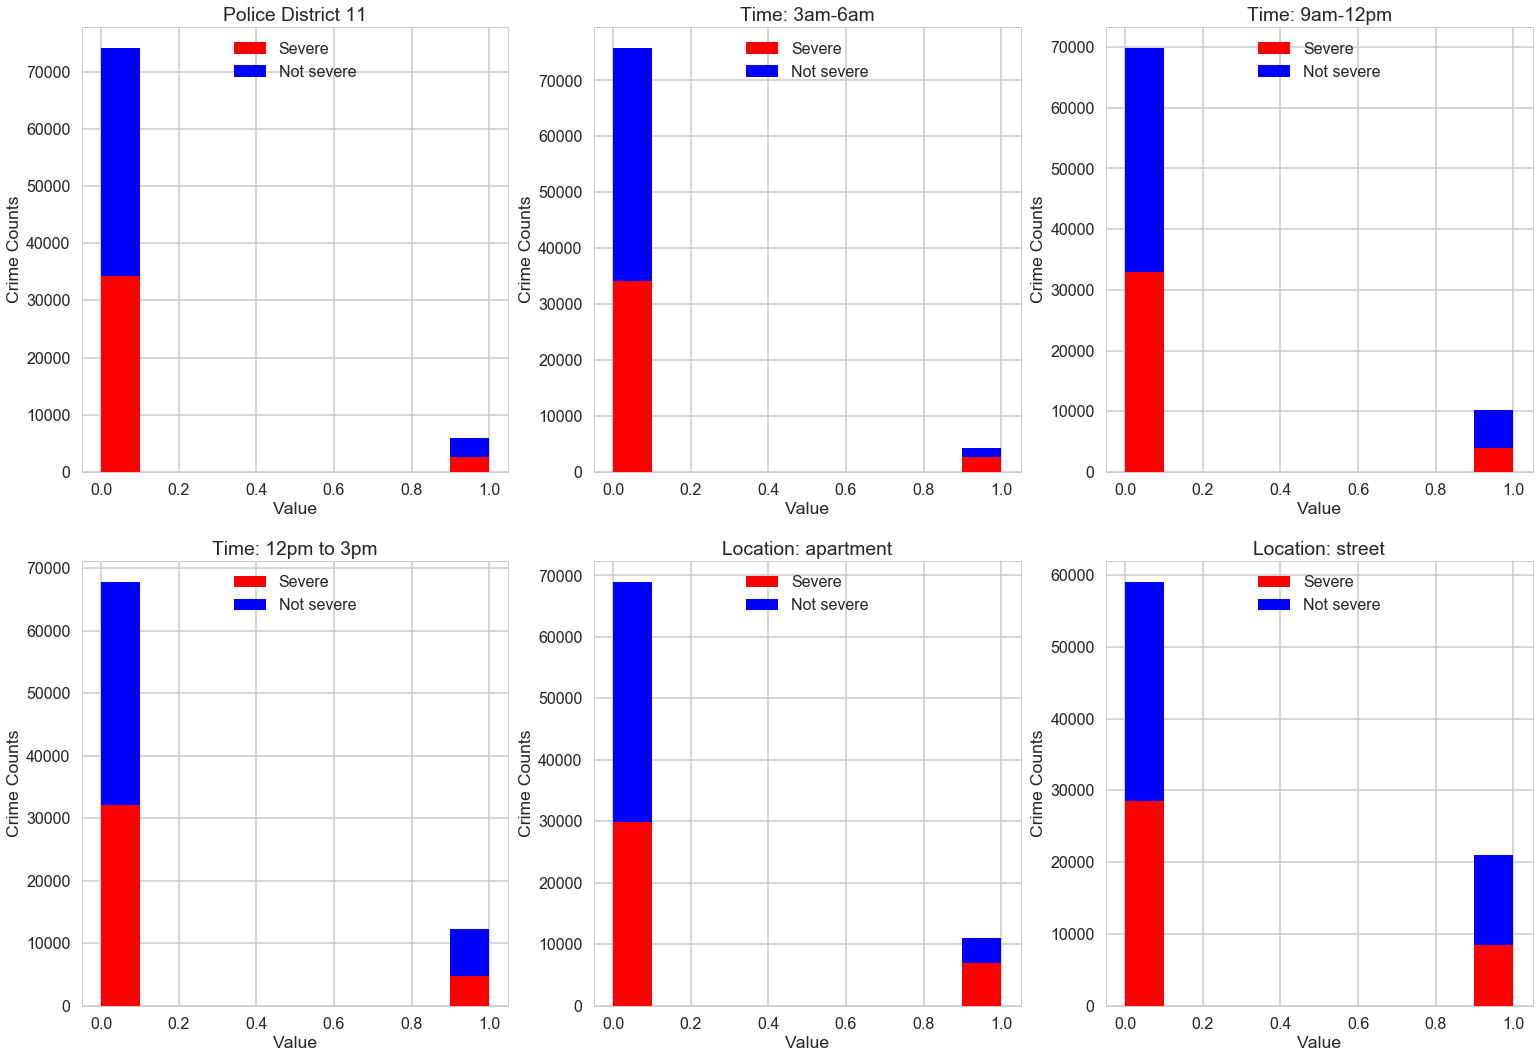

In [46]:
#This cell is to plot those indicator variables that will be good predictor for whether a crime will be severe or not.
fig=plt.figure(figsize=(26,18))
plotfeature=["District_D11.0","Timeblock_3","Timeblock_9","Timeblock_12","Location.Description_APARTMENT","Location.Description_STREET"]
plotfeature_title=["Police District 11","Time: 3am-6am","Time: 9am-12pm", "Time: 12pm to 3pm","Location: apartment","Location: street"]
for k in range (6):
    ax=fig.add_subplot(2,3,k+1)
    ax.hist((pos[plotfeature[k]],neg[plotfeature[k]]),stacked=True,color=("red","blue"),range=[0,1])
    ax.set_title(plotfeature_title[k])
    ax.legend(("Severe","Not severe"),loc="upper center")
    ax.set_xlabel("Value")
    ax.set_ylabel("Crime Counts")

# Model 0 - Baseline model

In [54]:
pos=data[data['severe']==1]
neg=data[data['severe']==0]
percent_severe=float(len(pos))/len(data)
percent_non_severe=float(len(neg))/len(data)
print (percent_severe, percent_non_severe)

0.4607125 0.5392875


In [55]:
#Let's make a dictionary storing confusion matrix for all the algorithms, so that we can have some comparison
confusion_dict={}
confusion_dict["Baseline_model"]=np.asarray([[len(neg),0],[len(pos),0]])
#Also create a dictionary to store all the models
model_dict={}
#The following dict will store the accuracy for training set
accuracy_dict={}
#The following dict will store the accuracy for test set
accuracy_dict1={}
train_not_severe_percent=1-float(sum(data["severe"].values[mask]))/len(data["severe"].values[mask])
test_not_severe_percent=1-float(sum(data["severe"].values[~mask]))/len(data["severe"].values[~mask])
print (train_not_severe_percent, test_not_severe_percent) 
accuracy_dict["Baseline_model"]=train_not_severe_percent
accuracy_dict1["Baseline_model"]=test_not_severe_percent

0.5389107142857144 0.5401666666666667


# Model 1 - Logistic regression with Lasso-based feature selection

In [56]:
#Got the X and y for traning set and test set
total_features=STANDARDIZABLE+INDICATOR

In [57]:
#reference: hw3 do_classify function
#Slightly modify the hw3 function, but overall very similar
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("Training accuracy: %0.2f" % (training_accuracy))
    print ("Test accuracy:     %0.2f" % (test_accuracy))
    confmatrix=confusion_matrix(ytest, clf.predict(Xtest))
    print (confmatrix)
    print (clf)
    return clf, Xtrain, ytrain, Xtest, ytest, confmatrix, training_accuracy, test_accuracy

/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [58]:
#reference: hw3 cv_optimize function
#we will use five fold validation by default
#This function is largely the same as the one in our hw
def cv_optimize(clf, parameters, X, y, n_folds=5, score_func=None):
    if score_func:
        gs=GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        gs=GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X, y)
    best = gs.best_estimator_
    return best

In [59]:
from sklearn.linear_model import LogisticRegression
clflog = LogisticRegression(penalty="l1")
clflog, Xtrain, ytrain, Xtest, ytest, confclflog, training_accuracy, test_accuracy=do_classify(clflog, {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 20.0, 40.0, 70.0, 100.0]}, data, total_features, u'severe', 1, mask=mask)
confusion_dict["Logistic"]=confclflog
model_dict["Logistic"]=clflog
accuracy_dict["Logistic"]=training_accuracy
accuracy_dict1["Logistic"]=test_accuracy

Training accuracy: 0.62
Test accuracy:     0.62
[[9099 3865]
 [5327 5709]]
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [60]:
#in addition to l2 (lasso) regularization, we also tried l2 regularization (the default mode). It works equally well and seems to run faster.
from sklearn.linear_model import LogisticRegression
clflog2 = LogisticRegression(penalty="l2")
clflog2, Xtrain, ytrain, Xtest, ytest, confclflog2, training_accuracy, test_accuracy=do_classify(clflog2, {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 20.0, 40.0, 70.0, 100.0]}, data, total_features, u'severe', 1, mask=mask)

Training accuracy: 0.62
Test accuracy:     0.62
[[9092 3872]
 [5296 5740]]
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


# Model 2 - Linear SVM

In [61]:
from sklearn.svm import LinearSVC
clfsvm=LinearSVC(loss="hinge")
clfsvm, Xtrain, ytrain, Xtest, ytest, confclfsvm, training_accuracy, test_accuracy= do_classify(clfsvm, {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 50, 100.0]}, data, total_features, u'severe',1, mask=mask)
confusion_dict["svm"]=confclfsvm
model_dict["svm"]=clfsvm
accuracy_dict["svm"]=training_accuracy
accuracy_dict1["svm"]=test_accuracy

Training accuracy: 0.61
Test accuracy:     0.61
[[10570  2394]
 [ 7015  4021]]
LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)


# Model 3 - Decision tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
clfdt=DecisionTreeClassifier()
clfdt, Xtrain, ytrain, Xtest, ytest, confclfdt, training_accuracy, test_accuracy = do_classify(clfdt, {"max_depth":np.arange(1,20,2)}, data, total_features, u'severe',1, mask=mask)
confusion_dict["decision tree"]=confclfdt
model_dict["decision tree"]=clfdt
accuracy_dict["decision tree"]=training_accuracy
accuracy_dict1["decision tree"]=test_accuracy

Training accuracy: 0.64
Test accuracy:     0.61
[[10221  2743]
 [ 6714  4322]]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


# Model 4 - Naive Bayes model

In [64]:
from sklearn.naive_bayes import GaussianNB
clfgnb = GaussianNB()
clfgnb, Xtrain, ytrain, Xtest, ytest, confgnb, training_accuracy, test_accuracy=do_classify(clfgnb, None, data, total_features, u'severe',1, mask=mask)
confusion_dict["Naive Bayes"]=confgnb
model_dict["Naive Bayes"]=clfgnb
accuracy_dict["Naive Bayes"]=training_accuracy
accuracy_dict1["Naive Bayes"]=test_accuracy

Training accuracy: 0.56
Test accuracy:     0.56
[[5005 7959]
 [2601 8435]]
GaussianNB(priors=None)


# Model 5 - Random forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
randf=RandomForestClassifier()
clfrdf, Xtrain, ytrain, Xtest, ytest, confrdf, training_accuracy, test_accuracy=do_classify(randf, {"n_estimators":[10, 20, 30, 40, 100]}, data, total_features, u'severe',1, mask=mask)
confusion_dict["Random forest"]=confrdf
model_dict["Random forest"]=clfrdf
accuracy_dict["Random forest"]=training_accuracy
accuracy_dict1["Random forest"]=test_accuracy

Training accuracy: 1.00
Test accuracy:     0.61
[[8747 4217]
 [5238 5798]]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


# Model 6 - KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh, Xtrain1, ytrain1, Xtest1, ytest1, confknn, training_accuracy, test_accuracy=do_classify(neigh, {"n_neighbors":[5, 10, 20, 40]}, data, total_features, u'severe',1, mask=mask)
confusion_dict["KNN"]=confknn
model_dict["KNN"]=neigh
accuracy_dict["KNN"]=training_accuracy
accuracy_dict1["KNN"]=test_accuracy

Training accuracy: 0.64
Test accuracy:     0.61
[[9510 3454]
 [5997 5039]]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=40, p=2,
           weights='uniform')


# Compare testing accuracy

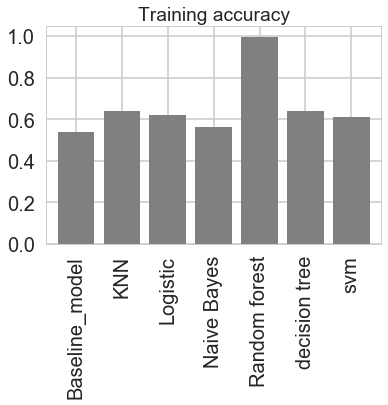

In [67]:
#Compare training and testing accuracy
pd.Series(accuracy_dict).plot(kind="bar",title="Training accuracy",width=0.8,color="grey", fontsize=20)

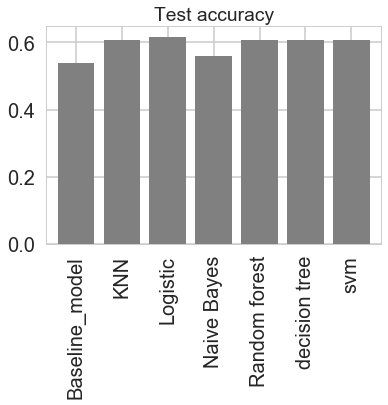

In [68]:
#Compare training and testing accuracy
pd.Series(accuracy_dict1).plot(kind="bar",title="Test accuracy",width=0.8, color="grey",fontsize=20)

# Identify important factors determining whether a crime is severe or not based on coefficients


In [70]:
def nonzero_lasso(clf):
    featuremask=(clf.coef_ !=0.0)[0]
    return pd.DataFrame(dict(feature=total_features, coef=clf.coef_[0], abscoef=np.abs(clf.coef_[0])))[featuremask].sort_values('abscoef', ascending=False)
lasso_importances=nonzero_lasso(clflog)
lasso_importances.head(50)

,abscoef,coef,feature
60,1.674166,-1.674166,Location.Description_DEPARTMENT STORE
70,1.036261,1.036261,"Location.Description_SCHOOL, PUBLIC, BUILDING"
71,1.017389,1.017389,"Location.Description_SCHOOL, PUBLIC, GROUNDS"
54,0.881383,0.881383,Location.Description_APARTMENT
66,0.854387,0.854387,Location.Description_RESIDENCE PORCH/HALLWAY
62,0.812895,-0.812895,Location.Description_GROCERY FOOD STORE
37,0.667294,0.667294,Timeblock_3
73,0.500253,-0.500253,Location.Description_SMALL RETAIL STORE
72,0.486154,0.486154,Location.Description_SIDEWALK
39,0.386538,-0.386538,Timeblock_9


# Multiclass classification into crime types

In [134]:
data2=data_large.sample(80000)
data2=data2.drop(["ID","Date","Block","IUCR","Description","Ward","Community.Area","FBI.Code","severe"], axis=1)
data2=data2.drop(["X.Coordinate","Y.Coordinate","Year","Location","District","time_24hour","Date_no_time"], axis=1)
data2.head()

,Latitude,Longitude,Primary.Type_ARSON,Primary.Type_ASSAULT,Primary.Type_BATTERY,Primary.Type_BURGLARY,Primary.Type_CRIM.SEXUAL.ASSAULT,Primary.Type_CRIMINAL.DAMAGE,Primary.Type_CRIMINAL.TRESPASS,Primary.Type_DECEPTIVE.PRACTICE,Primary.Type_GAMBLING,Primary.Type_HOMICIDE,Primary.Type_INTERFERENCE.WITH.PUBLIC.OFFICER,Primary.Type_INTIMIDATION,Primary.Type_KIDNAPPING,Primary.Type_LIQUOR.LAW.VIOLATION,Primary.Type_MOTOR.VEHICLE.THEFT,Primary.Type_NARCOTICS,Primary.Type_OFFENSE.INVOLVING.CHILDREN,Primary.Type_PROSTITUTION,Primary.Type_PUBLIC.PEACE.VIOLATION,Primary.Type_ROBBERY,Primary.Type_SEX.OFFENSE,Primary.Type_STALKING,Primary.Type_THEFT,Primary.Type_WEAPONS.VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,Primary.Type,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX,Under18_over64,Unemployed,House_below_poverty,Location.Description_ALLEY,Location.Description_APARTMENT,Location.Description_BAR OR TAVERN,Location.Description_COMMERCIAL / BUSINESS OFFICE,Location.Description_CONVENIENCE STORE,Location.Description_CTA PLATFORM,Location.Description_CTA TRAIN,Location.Description_DEPARTMENT STORE,Location.Description_GAS STATION,Location.Description_GROCERY FOOD STORE,Location.Description_PARK PROPERTY,Location.Description_PARKING LOT/GARAGE(NON.RESID.),Location.Description_RESIDENCE,Location.Description_RESIDENCE PORCH/HALLWAY,Location.Description_RESIDENCE-GARAGE,Location.Description_RESIDENTIAL YARD (FRONT/BACK),Location.Description_RESTAURANT,"Location.Description_SCHOOL, PUBLIC, BUILDING","Location.Description_SCHOOL, PUBLIC, GROUNDS",Location.Description_SIDEWALK,Location.Description_SMALL RETAIL STORE,Location.Description_STREET,Location.Description_VACANT LOT/LAND,Location.Description_VEHICLE NON-COMMERCIAL
510079,41.963356,-87.734971,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CRIMINAL DAMAGE,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.398256,27249,34.0,31.6,10.0,13.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1463695,41.949048,-87.710336,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CRIMINAL DAMAGE,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1.487222,27249,34.0,31.6,10.0,13.1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
917810,41.684090,-87.653064,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,BURGLARY,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.944598,16563,62.0,42.1,19.4,25.9,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
371079,41.900450,-87.752504,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,BATTERY,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1.422365,15957,73.0,37.9,22.6,28.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
175062,41.877586,-87.683124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PUBLIC PEACE VIOLATION,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1.182533,44689,15.0,22.2,10.7,20.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [135]:
#np.nan_to_num(data2)
data2 = data2.fillna(data2.mean())
#data2 = data2.dropna()

#data2.isnull().values.any()
#data2.isnull().sum().sum()

In [136]:
print(data2.shape)
data2["Crime_interested"]=data2["Primary.Type_THEFT"]+data2["Primary.Type_BATTERY"]+data2["Primary.Type_NARCOTICS"]+data2["Primary.Type_CRIMINAL.DAMAGE"]
#only maintain the four specific crime types we are interested in classifying
data2=data2[data2["Crime_interested"]==1]
print(data2.shape)
data2.head()

(80000, 94)
(51624, 95)


,Latitude,Longitude,Primary.Type_ARSON,Primary.Type_ASSAULT,Primary.Type_BATTERY,Primary.Type_BURGLARY,Primary.Type_CRIM.SEXUAL.ASSAULT,Primary.Type_CRIMINAL.DAMAGE,Primary.Type_CRIMINAL.TRESPASS,Primary.Type_DECEPTIVE.PRACTICE,Primary.Type_GAMBLING,Primary.Type_HOMICIDE,Primary.Type_INTERFERENCE.WITH.PUBLIC.OFFICER,Primary.Type_INTIMIDATION,Primary.Type_KIDNAPPING,Primary.Type_LIQUOR.LAW.VIOLATION,Primary.Type_MOTOR.VEHICLE.THEFT,Primary.Type_NARCOTICS,Primary.Type_OFFENSE.INVOLVING.CHILDREN,Primary.Type_PROSTITUTION,Primary.Type_PUBLIC.PEACE.VIOLATION,Primary.Type_ROBBERY,Primary.Type_SEX.OFFENSE,Primary.Type_STALKING,Primary.Type_THEFT,Primary.Type_WEAPONS.VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,Primary.Type,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX,Under18_over64,Unemployed,House_below_poverty,Location.Description_ALLEY,Location.Description_APARTMENT,Location.Description_BAR OR TAVERN,Location.Description_COMMERCIAL / BUSINESS OFFICE,Location.Description_CONVENIENCE STORE,Location.Description_CTA PLATFORM,Location.Description_CTA TRAIN,Location.Description_DEPARTMENT STORE,Location.Description_GAS STATION,Location.Description_GROCERY FOOD STORE,Location.Description_PARK PROPERTY,Location.Description_PARKING LOT/GARAGE(NON.RESID.),Location.Description_RESIDENCE,Location.Description_RESIDENCE PORCH/HALLWAY,Location.Description_RESIDENCE-GARAGE,Location.Description_RESIDENTIAL YARD (FRONT/BACK),Location.Description_RESTAURANT,"Location.Description_SCHOOL, PUBLIC, BUILDING","Location.Description_SCHOOL, PUBLIC, GROUNDS",Location.Description_SIDEWALK,Location.Description_SMALL RETAIL STORE,Location.Description_STREET,Location.Description_VACANT LOT/LAND,Location.Description_VEHICLE NON-COMMERCIAL,Crime_interested
510079,41.963356,-87.734971,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CRIMINAL DAMAGE,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.398256,27249,34.0,31.6,10.0,13.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1463695,41.949048,-87.710336,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CRIMINAL DAMAGE,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1.487222,27249,34.0,31.6,10.0,13.1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
371079,41.900450,-87.752504,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,BATTERY,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1.422365,15957,73.0,37.9,22.6,28.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1443608,41.968276,-87.724949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NARCOTICS,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.223498,21323,53.0,32.0,10.0,19.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1615803,41.974284,-87.842771,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CRIMINAL DAMAGE,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,3.933134,25828,24.0,30.3,7.1,15.4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [137]:
def get_categorical_integer(row):
    if row=="THEFT":
        return int(0)
    elif row=="BATTERY":
        return int(1)
    elif row=="CRIMINAL DAMAGE":
        return int(2)
    elif row=="NARCOTICS":
        return int(3)

#Assign each of the crime type an integer identifier. We will input these integer identifier directly for the algorithms below.
data2["category"]=data2["Primary.Type"].apply(get_categorical_integer)

In [138]:
#Previously we dropped rows that are not in the four types, which mess up the integer index of the dataframe
#here we reset the integer index. This is required for the mask to work.
data2 = data2.reset_index(drop=True)
data2.head()

,Latitude,Longitude,Primary.Type_ARSON,Primary.Type_ASSAULT,Primary.Type_BATTERY,Primary.Type_BURGLARY,Primary.Type_CRIM.SEXUAL.ASSAULT,Primary.Type_CRIMINAL.DAMAGE,Primary.Type_CRIMINAL.TRESPASS,Primary.Type_DECEPTIVE.PRACTICE,Primary.Type_GAMBLING,Primary.Type_HOMICIDE,Primary.Type_INTERFERENCE.WITH.PUBLIC.OFFICER,Primary.Type_INTIMIDATION,Primary.Type_KIDNAPPING,Primary.Type_LIQUOR.LAW.VIOLATION,Primary.Type_MOTOR.VEHICLE.THEFT,Primary.Type_NARCOTICS,Primary.Type_OFFENSE.INVOLVING.CHILDREN,Primary.Type_PROSTITUTION,Primary.Type_PUBLIC.PEACE.VIOLATION,Primary.Type_ROBBERY,Primary.Type_SEX.OFFENSE,Primary.Type_STALKING,Primary.Type_THEFT,Primary.Type_WEAPONS.VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,Primary.Type,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX,Under18_over64,Unemployed,House_below_poverty,Location.Description_ALLEY,Location.Description_APARTMENT,Location.Description_BAR OR TAVERN,Location.Description_COMMERCIAL / BUSINESS OFFICE,Location.Description_CONVENIENCE STORE,Location.Description_CTA PLATFORM,Location.Description_CTA TRAIN,Location.Description_DEPARTMENT STORE,Location.Description_GAS STATION,Location.Description_GROCERY FOOD STORE,Location.Description_PARK PROPERTY,Location.Description_PARKING LOT/GARAGE(NON.RESID.),Location.Description_RESIDENCE,Location.Description_RESIDENCE PORCH/HALLWAY,Location.Description_RESIDENCE-GARAGE,Location.Description_RESIDENTIAL YARD (FRONT/BACK),Location.Description_RESTAURANT,"Location.Description_SCHOOL, PUBLIC, BUILDING","Location.Description_SCHOOL, PUBLIC, GROUNDS",Location.Description_SIDEWALK,Location.Description_SMALL RETAIL STORE,Location.Description_STREET,Location.Description_VACANT LOT/LAND,Location.Description_VEHICLE NON-COMMERCIAL,Crime_interested,category
0,41.963356,-87.734971,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CRIMINAL DAMAGE,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.398256,27249,34.0,31.6,10.0,13.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
1,41.949048,-87.710336,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CRIMINAL DAMAGE,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1.487222,27249,34.0,31.6,10.0,13.1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2
2,41.900450,-87.752504,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,BATTERY,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1.422365,15957,73.0,37.9,22.6,28.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,41.968276,-87.724949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NARCOTICS,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.223498,21323,53.0,32.0,10.0,19.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3
4,41.974284,-87.842771,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CRIMINAL DAMAGE,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,3.933134,25828,24.0,30.3,7.1,15.4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2


In [139]:
def do_classify2(clf, parameters, indf, featurenames,targetname, mask, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
#y will be an array with integer values for different categories (0, 1, 2, 3...)
    y=indf[targetname]
    Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("Training accuracy: %0.2f" % (training_accuracy))
    print( "Test accuracy:     %0.2f" % (test_accuracy))
    confmatrix=confusion_matrix(ytest, clf.predict(Xtest))
    print (confmatrix)
    print (clf)
    return clf, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy

In [140]:
mask=np.ones(data2.shape[0], dtype='int')
itrain, itest = train_test_split(range(data2.shape[0]), train_size=0.7)
mask[itrain]=1
mask[itest]=0
mask=(mask==1)

In [141]:
#from sklearn.preprocessing import StandardScaler
#Standardize training set
data2.loc[mask,STANDARDIZABLE]=StandardScaler().fit_transform(data2.loc[mask,STANDARDIZABLE])
#Standardize test set
data2.loc[~mask,STANDARDIZABLE]=StandardScaler().fit_transform(data2.loc[~mask,STANDARDIZABLE])
data2.head()

,Latitude,Longitude,Primary.Type_ARSON,Primary.Type_ASSAULT,Primary.Type_BATTERY,Primary.Type_BURGLARY,Primary.Type_CRIM.SEXUAL.ASSAULT,Primary.Type_CRIMINAL.DAMAGE,Primary.Type_CRIMINAL.TRESPASS,Primary.Type_DECEPTIVE.PRACTICE,Primary.Type_GAMBLING,Primary.Type_HOMICIDE,Primary.Type_INTERFERENCE.WITH.PUBLIC.OFFICER,Primary.Type_INTIMIDATION,Primary.Type_KIDNAPPING,Primary.Type_LIQUOR.LAW.VIOLATION,Primary.Type_MOTOR.VEHICLE.THEFT,Primary.Type_NARCOTICS,Primary.Type_OFFENSE.INVOLVING.CHILDREN,Primary.Type_PROSTITUTION,Primary.Type_PUBLIC.PEACE.VIOLATION,Primary.Type_ROBBERY,Primary.Type_SEX.OFFENSE,Primary.Type_STALKING,Primary.Type_THEFT,Primary.Type_WEAPONS.VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,Primary.Type,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station,Income,HARDSHIP INDEX,Under18_over64,Unemployed,House_below_poverty,Location.Description_ALLEY,Location.Description_APARTMENT,Location.Description_BAR OR TAVERN,Location.Description_COMMERCIAL / BUSINESS OFFICE,Location.Description_CONVENIENCE STORE,Location.Description_CTA PLATFORM,Location.Description_CTA TRAIN,Location.Description_DEPARTMENT STORE,Location.Description_GAS STATION,Location.Description_GROCERY FOOD STORE,Location.Description_PARK PROPERTY,Location.Description_PARKING LOT/GARAGE(NON.RESID.),Location.Description_RESIDENCE,Location.Description_RESIDENCE PORCH/HALLWAY,Location.Description_RESIDENCE-GARAGE,Location.Description_RESIDENTIAL YARD (FRONT/BACK),Location.Description_RESTAURANT,"Location.Description_SCHOOL, PUBLIC, BUILDING","Location.Description_SCHOOL, PUBLIC, GROUNDS",Location.Description_SIDEWALK,Location.Description_SMALL RETAIL STORE,Location.Description_STREET,Location.Description_VACANT LOT/LAND,Location.Description_VEHICLE NON-COMMERCIAL,Crime_interested,category
0,1.408522,-1.089413,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CRIMINAL DAMAGE,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,-1.279078,0.062635,-0.663241,-0.393587,-0.882381,-1.131798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
1,1.240783,-0.661216,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CRIMINAL DAMAGE,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0.412067,0.062635,-0.663241,-0.393587,-0.882381,-1.131798,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2
2,0.613785,-1.215351,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,BATTERY,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.054224,-0.519069,0.611314,0.358570,0.717642,0.351306,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1.466201,-0.915214,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NARCOTICS,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,-1.550474,-0.247864,-0.035665,-0.345136,-0.882381,-0.543323,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3
4,1.536642,-2.963111,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CRIMINAL DAMAGE,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,4.210522,-0.011819,-0.993543,-0.551050,-1.253764,-0.909914,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2


# Model 0: Base-line model
    

In [144]:
print(float(len(data2[data2["category"]==0]))/len(data2))
train_theft_percent=float(sum(data2["Primary.Type_THEFT"].values[mask]))/len(data2["Primary.Type_THEFT"].values[mask])
test_theft_percent=float(sum(data2["Primary.Type_THEFT"].values[~mask]))/len(data2["Primary.Type_THEFT"].values[~mask])

print(train_theft_percent)
print(test_theft_percent)

accuracy_multi_train={}
accuracy_multi_test={}
accuracy_multi_train["Baseline model"]=train_theft_percent
accuracy_multi_test["Baseline model"]=test_theft_percent

0.3544669146133581
0.35596081470002217
0.3509814049586777


# Model 1: Decision tree for multiclass

In [146]:
from sklearn.tree import DecisionTreeClassifier
clfdt_multi=DecisionTreeClassifier()
clfdt_multi, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy=do_classify2(clfdt_multi, {"max_depth":np.arange(1,20,2)}, data2, total_features, "category", mask=mask)
accuracy_multi_train["Decision tree multiclass"]=training_accuracy
accuracy_multi_test["Decision tree multiclass"]=test_accuracy

Training accuracy: 0.53
Test accuracy:     0.50
[[4346  930   48  112]
 [1890 2390   29  520]
 [1793  874  100   33]
 [1230  330    9  854]]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


# Model 2: Random forest for multiclass

In [147]:
from sklearn.ensemble import RandomForestClassifier
randfmulti=RandomForestClassifier()
randfmulti, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy=do_classify2(randfmulti, {"n_estimators":[10, 20, 30, 40, 100]}, data2, total_features, "category", mask=mask)
accuracy_multi_train["Random forest multiclass"]=training_accuracy
accuracy_multi_test["Random forest multiclass"]=test_accuracy

Training accuracy: 1.00
Test accuracy:     0.50
[[3543 1100  480  313]
 [1229 2719  353  528]
 [1213  901  495  191]
 [ 557  658  192 1016]]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


# Model 3: Logistic regression for multiclass

In [148]:
from sklearn.linear_model import LogisticRegression
clflogmulti=LogisticRegression(penalty="l2",multi_class='multinomial',solver="newton-cg",max_iter=100)
clflogmulti, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy=do_classify2(clflogmulti, {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, data2, total_features, 'category', mask=mask)
accuracy_multi_train["Logistic - newton cg"]=training_accuracy
accuracy_multi_test["Logistic - newton cg"]=test_accuracy

Training accuracy: 0.53
Test accuracy:     0.53
[[3639 1166  346  285]
 [1042 2991  230  566]
 [1233  972  433  162]
 [ 600  510  192 1121]]
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)


In [149]:
from sklearn.linear_model import LogisticRegression
clflogmulti2 = LogisticRegression(penalty="l2",multi_class='multinomial',solver="lbfgs",max_iter=400)
clflogmulti2, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy=do_classify2(clflogmulti2, {"C": [0.01, 0.1, 1.0, 10.0]}, data2, total_features, 'category', mask=mask)
accuracy_multi_train["Logistic - lbfgs"]=training_accuracy
accuracy_multi_test["Logistic - lbfgs"]=test_accuracy

Training accuracy: 0.53
Test accuracy:     0.53
[[3640 1166  345  285]
 [1041 2992  230  566]
 [1234  972  433  161]
 [ 601  509  192 1121]]
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=400, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


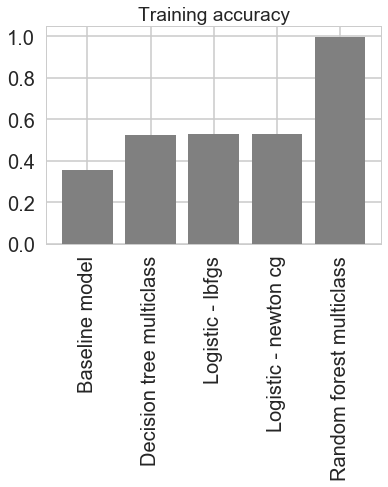

In [150]:
#Compare training and testing accuracy
pd.Series(accuracy_multi_train).plot(kind="bar",title="Training accuracy",width=0.8,color="grey", fontsize=20)

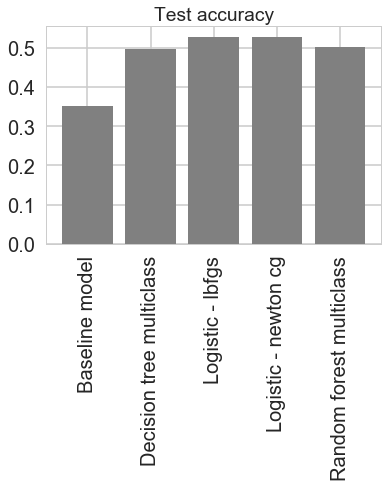

In [151]:
#Compare training and testing accuracy
pd.Series(accuracy_multi_test).plot(kind="bar",title="Test accuracy",width=0.8,color="grey", fontsize=20)

In [154]:
#What is the accuracy for two-type prediction for a baseline model?
total_predict=len(ytest)
correct_predict=0
baseline_accuracy=0
for i in range(0,total_predict):
    if ((ytest.iloc[i]==0) | (ytest.iloc[i]==1)):
        correct_predict += 1
    if ytest.iloc[i]==0:
        baseline_accuracy += 1
print(float(correct_predict)/total_predict)

0.6627711776859504


In [155]:
#Reference: http://stackoverflow.com/questions/6910641/how-to-get-indices-of-n-maximum-values-in-a-numpy-array
def accuracy_two_type(est, Xtest, ytest):
    probs=est.predict_proba(Xtest)
    correct_predict=0
    total_predict=len(ytest)
#For each line (a prediction with four probabilities for the four categories), we obtain the two most likely classes
#We checked whether the actual observation is in one of the two predictions
#If so, we call the result for this record of crime accurate
    for i in range(0,total_predict):
#This will return the column index of the two largest probabilities, which directly corresponds to type of crime
        ind=np.argpartition(probs[i,],-2)[-2:]
        if ytest.iloc[i] in ind:
            correct_predict+=1
        i+=1
    return float(correct_predict)/total_predict

In [156]:
print(accuracy_two_type(clflogmulti, Xtest, ytest))
print(accuracy_two_type(clflogmulti2, Xtest, ytest))

0.7805397727272727
0.7805397727272727


In [157]:
lasso_importances_multi=nonzero_lasso(clflogmulti)
lasso_importances_multi.head(50)

,abscoef,coef,feature
60,1.924831,1.924831,Location.Description_DEPARTMENT STORE
62,1.297612,1.297612,Location.Description_GROCERY FOOD STORE
53,1.085045,-1.085045,Location.Description_ALLEY
73,1.035061,1.035061,Location.Description_SMALL RETAIL STORE
71,0.974061,-0.974061,"Location.Description_SCHOOL, PUBLIC, GROUNDS"
72,0.856388,-0.856388,Location.Description_SIDEWALK
54,0.605625,-0.605625,Location.Description_APARTMENT
63,0.507056,-0.507056,Location.Description_PARK PROPERTY
57,0.496244,0.496244,Location.Description_CONVENIENCE STORE
59,0.487936,0.487936,Location.Description_CTA TRAIN
